# Aufgabe 5.1

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-2.24653305, -1.82989364, -1.06676984, -0.8303924 , -0.30873533,
         -0.16818013, -0.04023455,  0.77867835,  0.88044666,  0.95081457])),
 (1.1836286595358037, -0.3880799365046417, 0.9765698070432262))

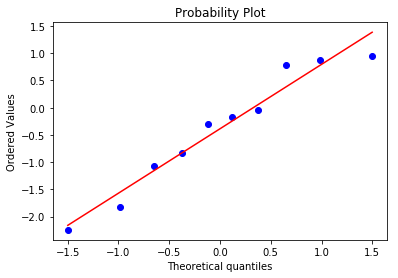

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

x = st.norm.rvs(size=10)
st.probplot(x,plot=plt)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-4.09322041, -4.04900397, -4.02084872, ...,  4.65131031,
          5.26684504,  6.36076895])),
 (1.057199730081191, -0.009080399433904601, 0.9987734200233612))

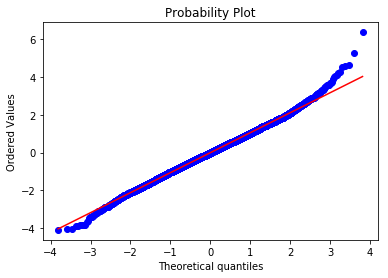

In [11]:
x = st.t.rvs(size=10000, df=20)
st.probplot(x,plot=plt)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

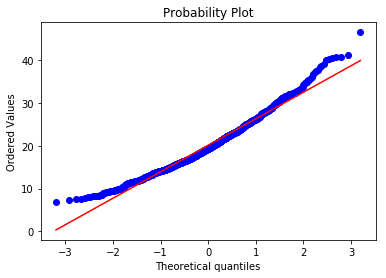

In [10]:
x = st.chi2.rvs(size=1000, df=20)
st.probplot(x,plot=plt)

# Aufgabe 5.2

In dieser Aufgabe untersuchen Sie die Wirkung des Zentralen Grenzwertsatzes mittels Simulation. Gehen Sie von einer Zufallsvariablen $X$ aus, die folgendermassen verteilt ist: die Werte 0, 10 und 11 werden je mit einer Wahrscheinlichkeit $\frac{1}{3}$ angenommen. 

Wir simulieren nun die Verteilung von $X$ sowie die Verteilung des Mittelwerts $\overline{X}_n$ von mehreren $X$.

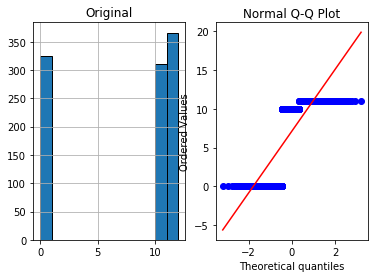

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import scipy.stats as st

werte = np.array([0,10,11])
sim = Series(np.random.choice(werte, size=1000, replace=True))


plt.subplot(1,2,1)
sim.hist(bins=[0,1,10,11,12],edgecolor="black")
plt.title("Original")

plt.subplot(1,2,2)
st.probplot(sim,plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

Wir simulieren nun $\overline{X}_5 = \frac{X_1+X_2+X_3+X_4+X_5}{5}$, wobei die $X_i$ die gleiche Verteilung haben wie $X$ und unabhängig sind. Stellen Sie die Verteilung von $\overline{X}_5$ anhand von 1000 Realisierungen von $\overline{X}_5$ dar, und vergleichen Sie mit der Normalverteilung.

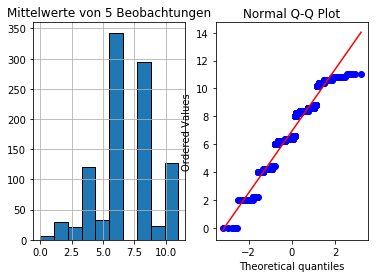

In [5]:
n = 5
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

Als nächstes simulieren wir nun die Verteilung von $\overline{X}_n$ auch für die Fälle, wo $\overline{X}_n$ das Mittel von $n=10$ resp. $n=200$ $X_i$ ist.

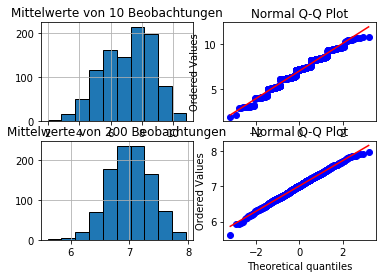

In [6]:
n = 10
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()

plt.subplot(2,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 10 Beobachtungen")

plt.subplot(2,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")


n = 200
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()

plt.subplot(2,2,3)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 200 Beobachtungen")

plt.subplot(2,2,4)
st.probplot(sim_mean, plot=plt)
plt.title("Normal Q-Q Plot")


plt.show()

Die obenstehenden Graphiken zeigen, dass die Form der Verteilung des Mittelwerts von unabhängigen Zufallsvariablen auch dann der Normalverteilung immer ähnlicher wird, wenn die Variablen selber überhaupt nicht normalverteilt sind. An der $x$-Achse sieht man auch, dass die Varianz immer kleiner wird.

Wir stellen also fest, dass $\overline{X}_n=\frac{U_1+U_2+\ldots+ U_n}{n}$ einer Normalverteilung folgt. Der Mittelwert $\overline{X}_n$ ergibt sich aus:
\begin{align*}
\mathrm{E}[\overline{X}_n]
=\frac{1}{n}\sum_{i=1}^{n}\mathrm{E}(U_i)
=\mathrm{E}(U_i)
=\ldots
\end{align*}
Die Standardabweichung von $\overline{X}_n$ folgt aus
\begin{align*}
\mathrm{Var}[\overline{X}_n] & =\frac{1}{n^2}\sum_{i=1}^{n}\mathrm{Var}(U_i)                                                            \\
& =\frac{\mathrm{Var}(U_i)}{n} \\
& = \ldots
\end{align*}
Somit ist die Standardabweichung von $\overline{X}_n$, also der Standardfehler, gegeben durch
\begin{align*}
\sigma_{\overline{X}_n}=\ldots
\end{align*}

In [14]:
import numpy as np
from pandas import Series, DataFrame

werte = np.array([0,10,11])
n = 200
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))

sim_mean = sim.mean()
sim_mean.mean()
print(sim_mean.mean())
sim_mean.std()
print(sim_mean.std())
np.sqrt(24.67/200)

6.994625
0.35043628517173414


0.35121218657671893

Experiment und Berechnung sind also in guter Uebereinstimmung. $\overline{X}_n$ folgt also der Verteilung $\mathcal{N}(7,0.12)$.